In [1]:
import numpy as np

import matplotlib.pyplot as plt

from matplotlib import rc

rc('text', usetex=False)
rc('font', family='serif', size=20)
rc('figure', figsize=(12,8))
rc('axes',linewidth=2)

%load_ext autoreload
%autoreload 2

# Test writer

In [21]:
from rw import scan_handler

In [22]:
folder_path = '/home/matteo/delme'     # dove sta la cartella con i txt
save_path = '/home/matteo/Scrivania'   # dove salvare il file hdf5 (il .scan)
name = 'prova'                         # nome del file .scan

In [23]:
test = scan_handler.ScanWriter(name,save_path)

In [24]:
test.set_general_info(data='23_03_2023',T_baw = 300, N_baw = 27, Note = 'nota a cazzo di cane')

In [25]:
test.write_resonances(path=folder_path)
test.close_file()

# Test reader

In [26]:
file_path = "/home/matteo/Scrivania/prova.scan"    # path del file da aprire

In [29]:
reader = scan_handler.ScanReader(file_path)

In [30]:
# Ottieni le info dello scan come dizionario
reader.get_scan_info()

{'baw_number': '27',
 'date': '23_03_2023',
 'note': 'nota a cazzo di cane',
 'temperature': 300.0}

In [32]:
# stampa tutti i nomi dei parametri delle varie risonanze che sono sul file (come lista)
reader.get_parameters_tags()

['f_center', 'ifbw', 'input_power']

In [34]:
# ottieni (come vettore) i valori del parametro scelto di TUTTE le risonanze
reader.get_parameters('f_center')

array([ 5259650. , 14094450. , 12427300. , 10732900. ,  6936550. ,
       15328837.5,  9625600. , 14914475. , 10658475. , 14060225. ,
       11484200. ,  3141725. , 19005012.5,  9544962.5, 11464887.5,
        9852487.5, 13544325. , 13156612.5, 13237850. , 15766787.5,
        5254925. ,  8434875. ,  3294800. ,  8772700. ,  1705112.5,
       13339875. , 15617262.5, 18008212.5, 14150050. , 16506475. ,
       16495700. , 15494450. , 13219725. , 16383400. ,  8845937.5,
        5954950. ,  8693050. , 13456100. ,  9730412.5, 15847400. ,
       15542475. , 13228875. ,  2654962.5, 12195175. , 16104012.5,
       16185262.5,  9390850. , 13559587.5, 13095900. ,  6594087.5,
       18327062.5,  5732050. , 17560925. , 14061912.5,  9545412.5,
       13421112.5, 13297412.5, 16928062.5, 10638362.5, 16429100. ,
        9750187.5, 15724975. , 13334800. ,  8686025. ,  9549350. ,
        8768975. ,  6493275. ,  8164600. , 16421700. , 16437662.5,
       10569762.5, 17654912.5, 16033975. ,  9449637.5, 1230822

In [35]:
# ottieni (come dizionario) tutte le info su UNA risonanza. 
# la risonanza puoi chiamarla con il numero con cui è salvata sull'hdf5
#           reader.get_resonance(number=12)
# la risonanza puoi chiamarla con la posizione in cui si trova nell'hdf5
#           reader.get_resonance(loc=7)
# la risonanza puoi chiamarla con la frequenza (la frequenza nel mezzo della finestra). 
# In questo caso dovrebbe trovarti la più vicina a quella chiesta

reader.get_resonance(freq=5.175e6)

{'f_center': 5175075.0,
 'ifbw': 10.0,
 'input_power': -20.0,
 'freq': array([5175025.   , 5175025.125, 5175025.25 , 5175025.375, 5175025.5  ,
        5175025.625, 5175025.75 , 5175025.875, 5175026.   , 5175026.125,
        5175026.25 , 5175026.375, 5175026.5  , 5175026.625, 5175026.75 ,
        5175026.875, 5175027.   , 5175027.125, 5175027.25 , 5175027.375,
        5175027.5  , 5175027.625, 5175027.75 , 5175027.875, 5175028.   ,
        5175028.125, 5175028.25 , 5175028.375, 5175028.5  , 5175028.625,
        5175028.75 , 5175028.875, 5175029.   , 5175029.125, 5175029.25 ,
        5175029.375, 5175029.5  , 5175029.625, 5175029.75 , 5175029.875,
        5175030.   , 5175030.125, 5175030.25 , 5175030.375, 5175030.5  ,
        5175030.625, 5175030.75 , 5175030.875, 5175031.   , 5175031.125,
        5175031.25 , 5175031.375, 5175031.5  , 5175031.625, 5175031.75 ,
        5175031.875, 5175032.   , 5175032.125, 5175032.25 , 5175032.375,
        5175032.5  , 5175032.625, 5175032.75 , 5175032

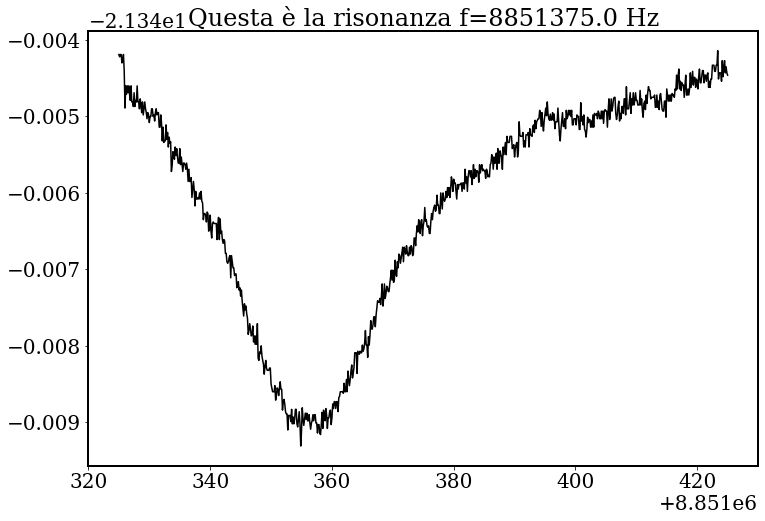

In [41]:
# esempio, plotto la risonanza che sta a circa 8 MHz
reso = reader.get_resonance(freq=9e6)

plt.title('Questa è la risonanza f='+str(reso['f_center'])+' Hz')
plt.plot(reso['freq'],reso['power'],c='k')
plt.show()